In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import f_oneway

In [39]:
sns.set_theme(style='whitegrid')

In [40]:
df = pd.read_csv('data_science_salaries.csv')
df.head()

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium


In [41]:
df.columns

Index(['job_title', 'experience_level', 'employment_type', 'work_models',
       'work_year', 'employee_residence', 'salary', 'salary_currency',
       'salary_in_usd', 'company_location', 'company_size'],
      dtype='object')

In [42]:
df.dtypes

job_title             object
experience_level      object
employment_type       object
work_models           object
work_year              int64
employee_residence    object
salary                 int64
salary_currency       object
salary_in_usd          int64
company_location      object
company_size          object
dtype: object

In [67]:
numberCols = df.select_dtypes(include='number').columns.to_list()
stringCols = df.select_dtypes(exclude='number').columns.to_list()

In [70]:
for cols in stringCols:
    print(cols)
    print(df[cols].unique())

job_title
['Data Engineer' 'Data Scientist' 'BI Developer' 'Research Analyst'
 'Business Intelligence Developer' 'Data Analyst'
 'Director of Data Science' 'MLOps Engineer' 'Machine Learning Scientist'
 'Machine Learning Engineer' 'Data Science Manager' 'Applied Scientist'
 'Business Intelligence Analyst' 'Analytics Engineer'
 'Business Intelligence Engineer' 'Data Science' 'Research Scientist'
 'Research Engineer' 'Managing Director Data Science' 'AI Engineer'
 'Data Specialist' 'Data Architect' 'Data Visualization Specialist'
 'ETL Developer' 'Data Science Practitioner' 'Computer Vision Engineer'
 'Data Lead' 'ML Engineer' 'Data Developer' 'Data Modeler'
 'Data Science Consultant' 'AI Architect' 'Data Analytics Manager'
 'Data Science Engineer' 'Data Product Manager' 'Data Quality Analyst'
 'Data Strategist' 'Prompt Engineer' 'Data Science Lead'
 'Business Intelligence Manager' 'Data Manager' 'Data Analytics Lead'
 'Machine Learning Infrastructure Engineer' 'Data Integration Engineer

In [327]:
regions = {
    'North America': ['United States', 'Canada', 'Mexico', 'Puerto Rico', 'Bahamas'],
    'Europe': ['Romania', 'Portugal', 'Ireland', 'United Kingdom', 'Spain', 'Germany', 'Ukraine', 'Turkey', 'Slovenia', 'Sweden', 'Russia', 'Poland', 'New Zealand', 'Norway', 'Netherlands', 'Latvia', 'Luxembourg', 'Lithuania', 'Italy', 'Hungary', 'Croatia', 'Gibraltar', 'France', 'Finland', 'Estonia', 'Denmark', 'Czech Republic', 'Bosnia and Herzegovina', 'Armenia', 'Andorra', 'Switzerland', 'Belgium', 'Austria', 'Malta', 'Moldova'],
    'Asia': ['Lebanon', 'India', 'Vietnam', 'Thailand', 'Singapore', 'Saudi Arabia', 'Qatar', 'Philippines', 'South Korea', 'Japan', 'Israel', 'Hong Kong', 'Greece', 'China', 'Malaysia', 'Iran', 'Indonesia', 'Iraq', 'United Arab Emirates', 'Pakistan'],
    'Africa': ['Egypt', 'South Africa', 'Nigeria', 'Kenya', 'Ghana', 'Central African Republic', 'Algeria', 'Mauritius'],
    'South America': ['Brazil', 'Argentina', 'Chile', 'Honduras', 'Colombia', 'Ecuador'],
    'Oceania' : ['Australia']
}
dfRegion = df.copy(True)
countryToRegion = {country: region for region, countries in regions.items() for country in countries}
dfRegion['region'] = dfRegion['company_location'].map(countryToRegion).fillna('Other')

# What is the work models in the data roles?

In [53]:
workModels = df['work_models'].value_counts()

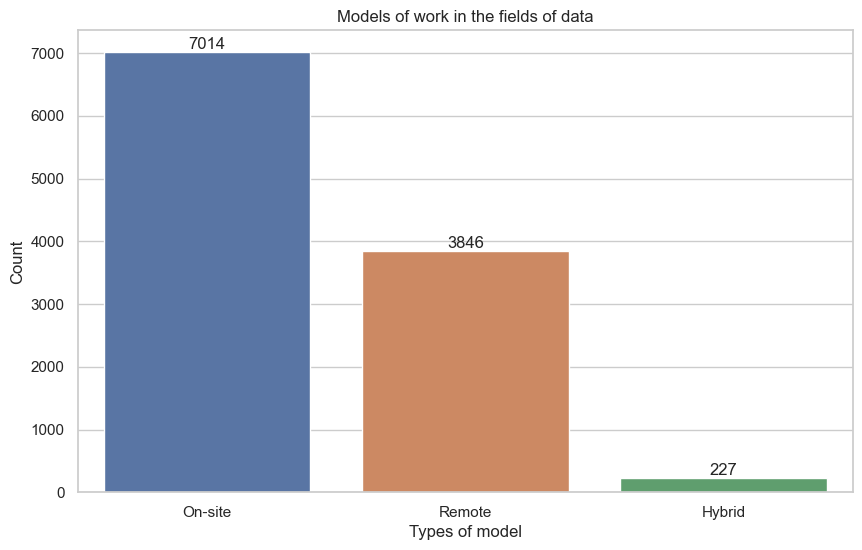

In [58]:
plt.figure(figsize=(10,6))
sns.barplot(x=workModels.index, y=workModels.values)
for i, val in enumerate(workModels.values):
    plt.text(i, val+i, str(val), ha='center', va='bottom')
plt.title('Models of work in the fields of data')
plt.xlabel('Types of model')
plt.ylabel('Count')
plt.show()

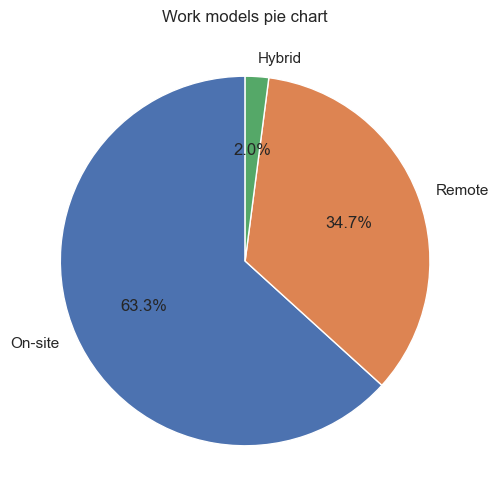

In [55]:
plt.figure(figsize=(10,6))
plt.pie(workModels.values, labels=workModels.index, autopct='%1.1f%%', startangle=90)
plt.title('Work models pie chart')
plt.show()

Based on the plot above, we can see that most of the workers work on-site than remote or hybrid. We can gain more insight if we know what's the type/size of the company that most of the remote workers work at. In addition, we can gain more insights about the industries if we know the value counts of each company sizes.

In [60]:
companySizes = df['company_size'].value_counts()

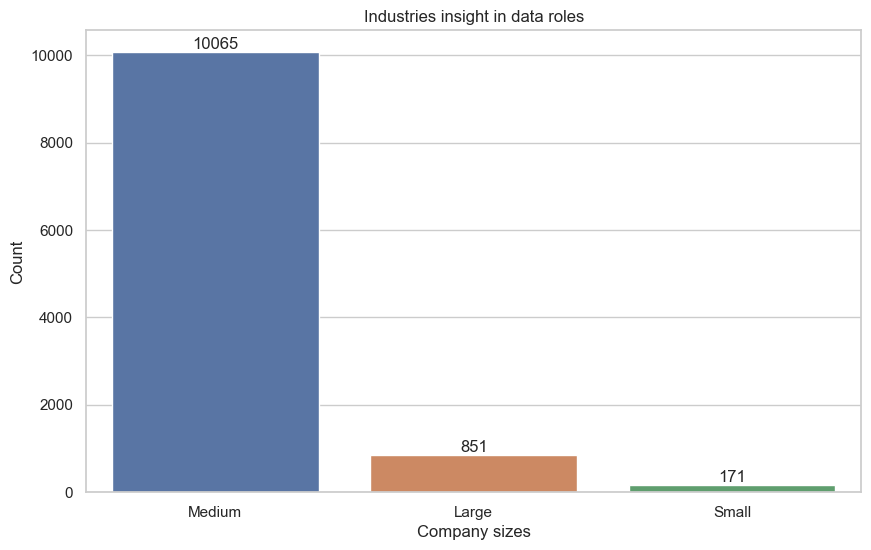

In [61]:
plt.figure(figsize=(10,6))
sns.barplot(x=companySizes.index, y=companySizes.values)
for i, val in enumerate(companySizes.values):
    plt.text(i, val+i, str(val), ha='center', va='bottom')
plt.title('Industries insight in data roles')
plt.xlabel('Company sizes')
plt.ylabel('Count')
plt.show()

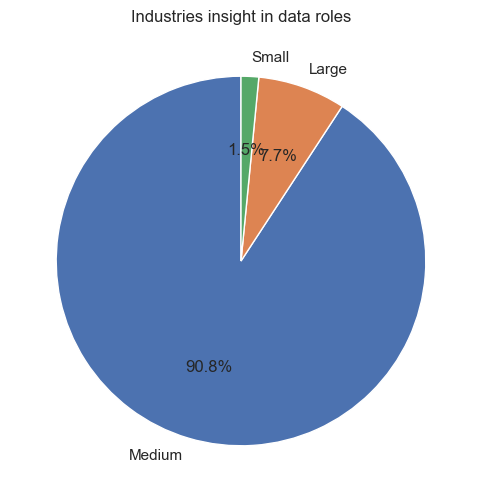

In [63]:
plt.figure(figsize=(10,6))
plt.pie(companySizes.values, labels=companySizes.index, autopct='%1.1f%%', startangle=90)
plt.title('Industries insight in data roles')
plt.show()

There're 3 company sizes based on the dataframe, let's merge that data to the work models to know what model for each company sizes.

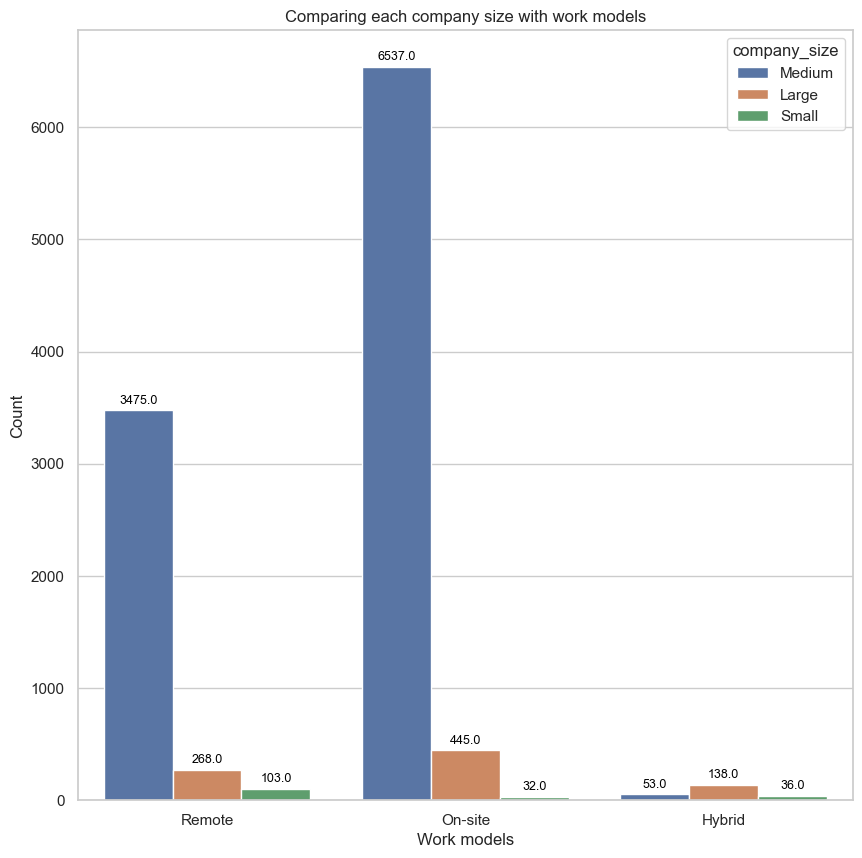

In [65]:
plt.figure(figsize=(10, 10))
ax = sns.countplot(x='work_models', hue='company_size', data=df)

# Add counts at the top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Comparing each company size with work models')
plt.xlabel('Work models')
plt.ylabel('Count')
plt.show()

based on the plot above, you can see that most of the workers work on-site than hybrid or remote

Based on the exploration above we can conclude several points below:
- Small companies tend to use remote work models than on-site
- Medium and large companies use all of the three work models (remote, on-site, and hybrid)
- Most of the medium and large companies use on-site work models however there're some companies that use remote or hybrid work models. However, hybrid work model is less used by companies.
- Almost all of the data roles works on Medium companies which is 90.8%

# In what country should i work if i want to achieve high salary?

We use top-down approach to answer this question by choosing the highest region salary and then breakdown the analysis based on the highest region.

To answer this question, we need to perform several analysis below:
1. Frequency analysis
2. Distribution analysis

In [328]:
countryValueCount = dfRegion.groupby('region')[['region']].value_counts().reset_index()
countryValueCount.describe()

,count
count,6.000000
mean,1847.833333
std,3974.852723
min,26.000000
25%,35.750000
50%,79.500000
75%,733.750000
max,9929.000000


In [329]:
countryValueCount

,region,count
0,Africa,26
1,Asia,118
2,Europe,939
3,North America,9929
4,Oceania,34
5,South America,41


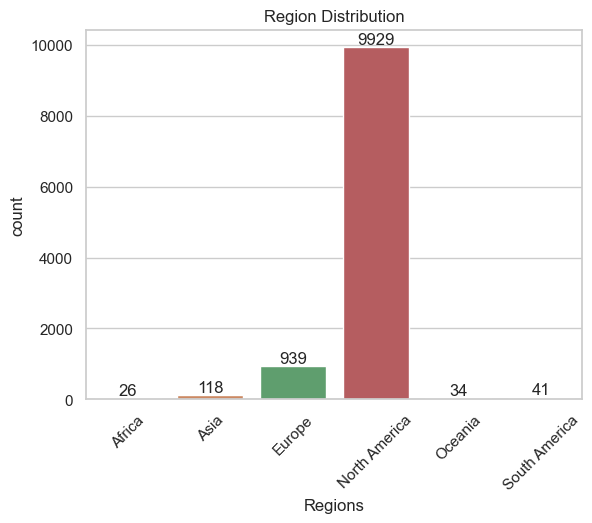

In [330]:
sns.barplot(x=countryValueCount['region'], y=countryValueCount['count'])
for i, (_, val) in enumerate(countryValueCount.values):
    plt.text(i, i+val, str(val), ha='center', va='bottom')
plt.xlabel('Regions')
plt.title('Region Distribution')
plt.xticks(rotation=45)
plt.show()

As you can see above, the distribution of the regions is not equally distributed this might cause an invalid analysis due to high gap between regions or country that might affecting salaries in those countries.

In [332]:
regionInsight = dfRegion.groupby('region')[['salary_in_usd']].std().reset_index().set_index('region').rename(columns={'salary_in_usd' : 'std_salary_in_usd'}).sort_values(by='std_salary_in_usd', ascending=False)
regionInsight

,std_salary_in_usd
region,
Oceania,79509.612829
North America,63482.013683
Asia,57837.302150
Europe,55721.763391
Africa,49715.825655
South America,30499.332911


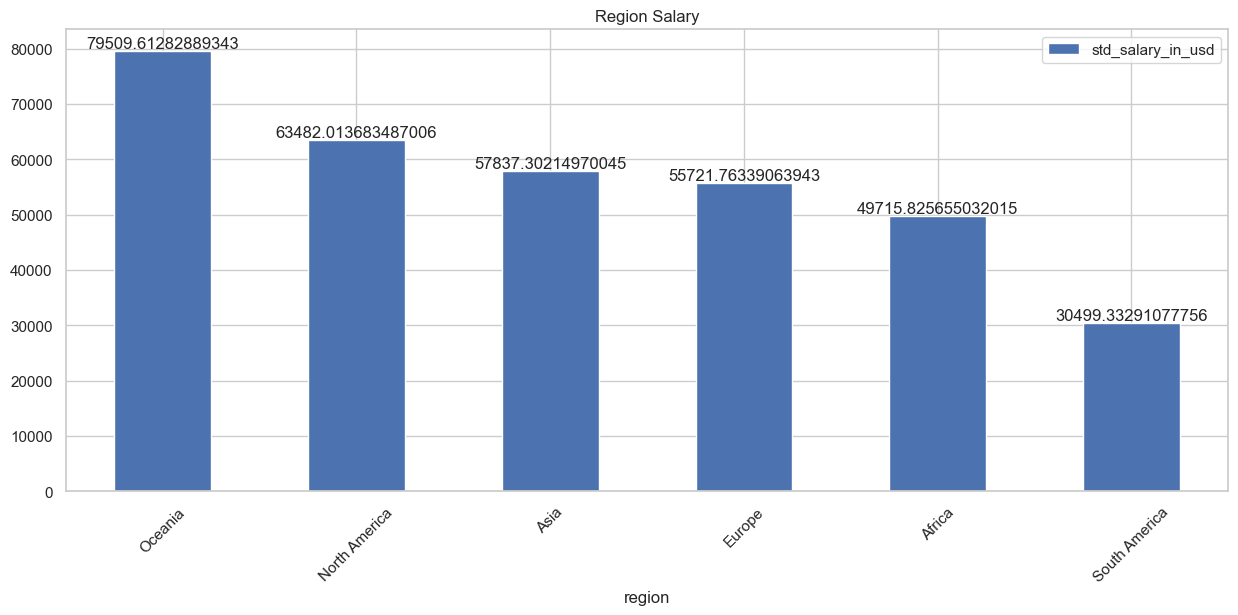

In [333]:
# sns.barplot(x=regionInsight.index, y=regionInsight.values)
regionInsight.plot(kind='bar', figsize=(15,6))
for i, val in enumerate(regionInsight.values):
    plt.text(i, val+i, str(val[0]), ha='center', va='bottom')
plt.title('Region Salary')
plt.xticks(rotation=45)
plt.show()

Based on the analysis of standard deviation, we can see that Australia has the highest values which means that Australia has high "mean" salary amongst other regions. Lets dive deeper on the countries of Oceania and North America which are the top two in highest region salary.

based on the descriptive statistics above, we can see that some countries only have 1 recorded data. In addition, in the histogram visualization we can see that the data is extremely skewed to the right which means that there are some countries that has extremely high values than most of the countries.

After the freqency and distribution analysis above, we can conclude that the dataset has high variance. In order to conduct further analysis we need to apply some normalization to deal with this extremely skewed dataset.

In [139]:
countryValueCountCopy = countryValueCount.copy(True)
scaler = MinMaxScaler()
countryValueCountCopy['count'] = scaler.fit_transform(countryValueCount['count'].values.reshape(-1,1))
countryValueCountCopy

,company_location,count
0,Algeria,0.000000
1,Andorra,0.000000
2,Argentina,0.000415
3,Armenia,0.000000
4,Australia,0.003425
...,...,...
70,Ukraine,0.000519
71,United Arab Emirates,0.000208
72,United Kingdom,0.053134
73,United States,1.000000


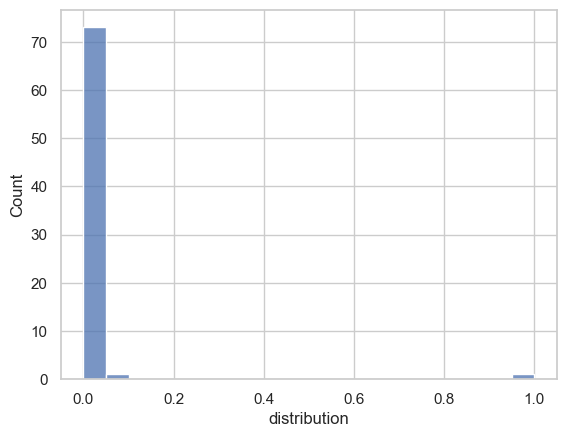

In [140]:
sns.histplot(countryValueCountCopy['count'], bins=20)
plt.xlabel('distribution')
plt.show()

It seems that the distribution doesn't change at all, this means that the nature of the data is it is what it is. Hence, we need to give a note for the answer of this question which is the dataset is highly skewed and has high variance.

In [278]:
countryInsight = df.groupby('company_location')[['salary_in_usd']].std().reset_index().set_index('company_location').rename(columns={'salary_in_usd' : 'std_salary_in_usd'}).sort_values(by='std_salary_in_usd', ascending=False)

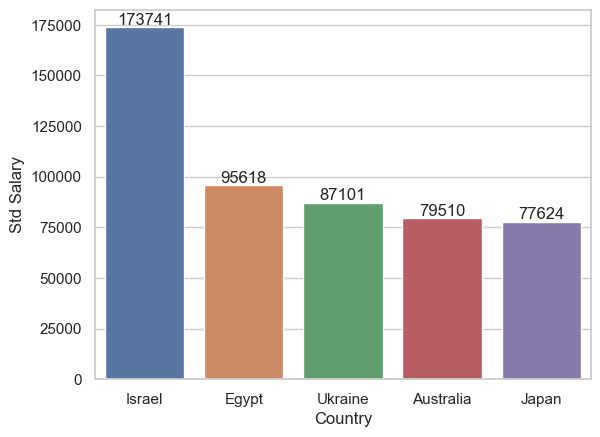

In [281]:
sns.barplot(data=countryInsight[:5], x=countryInsight.index[:5], y='std_salary_in_usd')
for i, val in enumerate(countryInsight.values[:5]):
    plt.text(i, val+i, f'{val[0]:.0f}', ha='center', va='bottom')
plt.xlabel('Country')
plt.ylabel('Std Salary')
plt.show()

Above is the top 5 countries that has the highest salary for data roles, however the dataset is highly skewed to the right and has high variance. Therefore, this insights might be invalid due to the dataset

# Which column affects a salary?

We need to know how many columns available in the dataset first.

In [171]:
print(f'We have {len(df.columns)} columns in the dataset')

We have 11 columns in the dataset


Since there're numerical and categorical columns within the dataset, we need to separate that columns first before conducting any analysis.

In [172]:
categoricalCols = df.select_dtypes(exclude='number').columns.to_list()
numericalCols = df.select_dtypes(include='number').columns.to_list()
print(f'For categorical columns we have {categoricalCols}')
print(f'For numerical columns we have {numericalCols}')

For categorical columns we have ['job_title', 'experience_level', 'employment_type', 'work_models', 'employee_residence', 'salary_currency', 'company_location', 'company_size']
For numerical columns we have ['work_year', 'salary', 'salary_in_usd']


We need to dive deeper on the work_year columns as we still dont know if the dataset only covers 2024 or maybe another previous year

In [174]:
print(f'{df["work_year"].unique()}')

[2024 2023 2022 2021 2020]


As you can see above, we have a range from 2020 to 2024. This insights might be useful to conduct further analysis. However, right now we're focusing on answering the question written in the heading.

In [197]:
def getANOVA(df, cols, alpha=0.05):
    ranked = {}
    for col in cols:
        uniqueVal = df[col].unique()
        groups = [df['salary_in_usd'][df[col] == unique] for unique in uniqueVal]
        _, p_value = f_oneway(*groups)
        if p_value > alpha:
            print(f'{col} Accept null hypothesis with p value of {p_value}')
        else:
            ranked[col] = p_value
    ranked = dict(sorted(ranked.items(), key=lambda val : val[1]))
    for i, (key, value) in enumerate(ranked.items()):
        print(f'{key} Reject null hypothesis with p value of {value} ranked {i}')

getANOVA(df, categoricalCols)

job_title Reject null hypothesis with p value of 0.0 ranked 0
experience_level Reject null hypothesis with p value of 0.0 ranked 1
salary_currency Reject null hypothesis with p value of 2.377176831096095e-301 ranked 2
employee_residence Reject null hypothesis with p value of 2.7583328366105273e-286 ranked 3
company_location Reject null hypothesis with p value of 1.7041484104239062e-272 ranked 4
work_models Reject null hypothesis with p value of 1.394407730732751e-65 ranked 5
company_size Reject null hypothesis with p value of 2.128929158434078e-41 ranked 6
employment_type Reject null hypothesis with p value of 1.6129319463843155e-13 ranked 7


Based on the ANOVA test above, we can see all the columns reject the null hypothesis which means that there's a significant difference in the mean of the salary in one or more groups. In addition, we can see that job_title and experience_level has 0 p value which means both of that features mean is different from mean of the salary indicating both features probably has stronger relationship to the salary.

Since job_title and experience_level has interesting p value, lets visualize both features in order to know the relationships to the salary. However, job_title has 173 unique value which will be cluttered to be visualized therefore here we use N-rank visualization. Both features will be visualized using boxplot visualization.

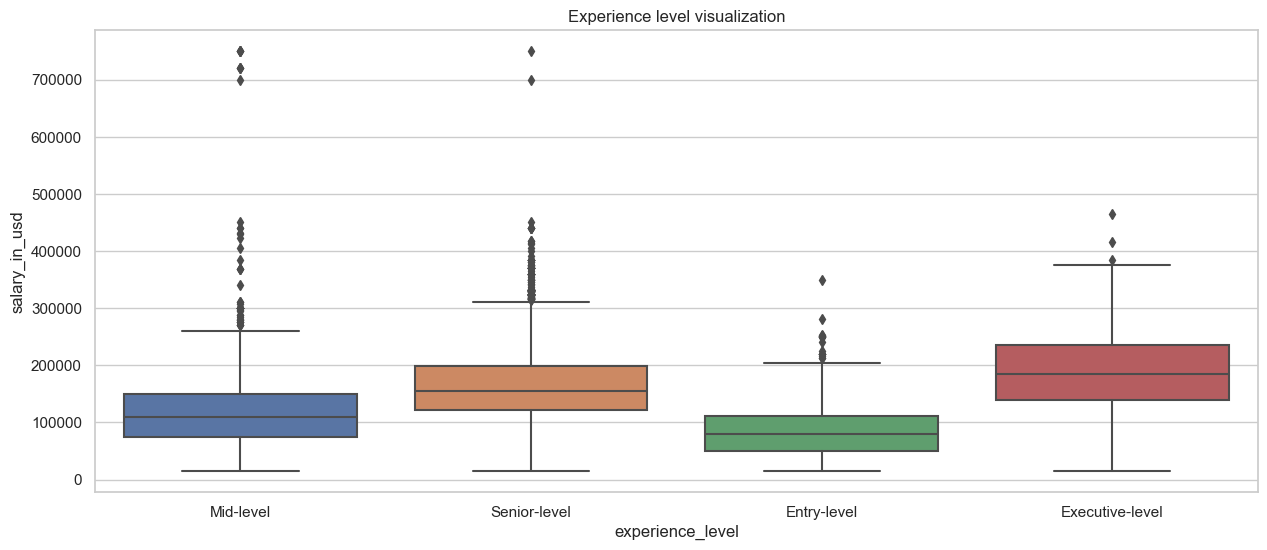

In [195]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df, x='experience_level', y='salary_in_usd')
plt.title('Experience level visualization')
plt.show()

As you can see above, it seems like most of the box is not widely overlapped. This means, there's a relationship between experience_level and salary.

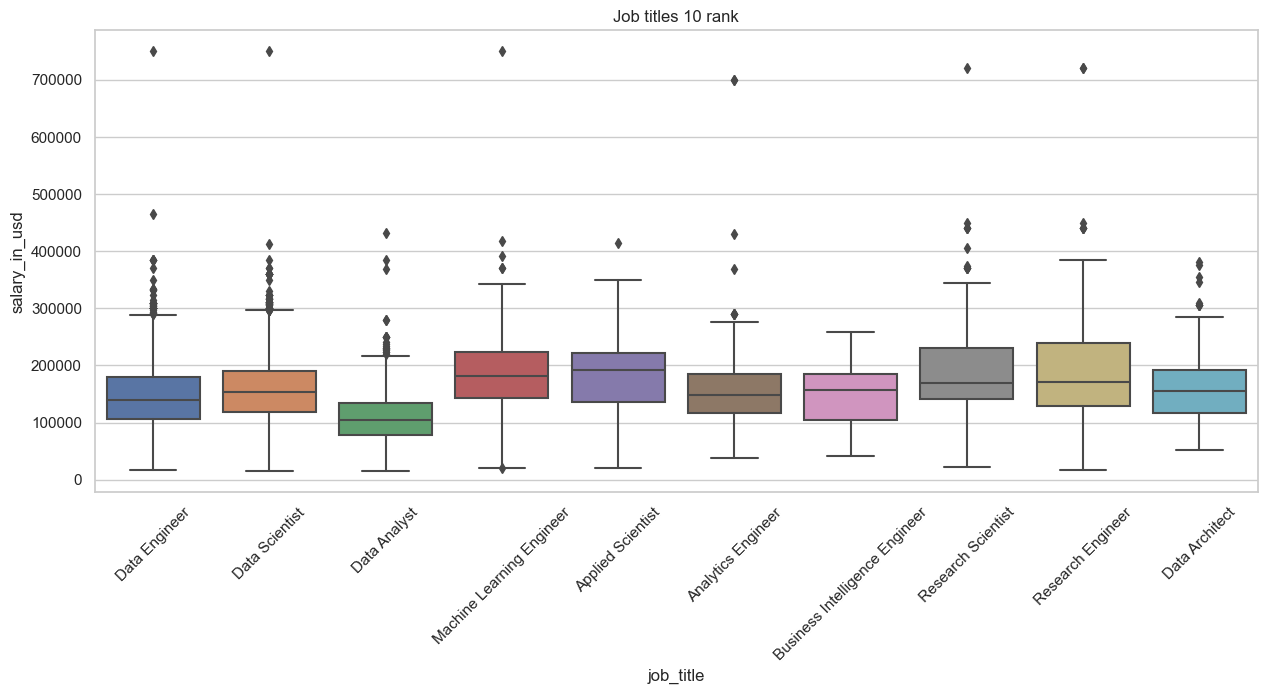

In [221]:
N = 10
jobTitleAffect = df.groupby('job_title').size().reset_index(name='count').sort_values(by='count', ascending=False)[:N]['job_title'].values
plt.figure(figsize=(15, 6))
sns.boxplot(x=df[df['job_title'].isin(jobTitleAffect)]['job_title'], y=df[df['job_title'].isin(jobTitleAffect)]['salary_in_usd'])
plt.title(f'Job titles {N} rank')
plt.xticks(rotation=45)
plt.show()

Above is the visualization of top-N job_title based on the frequency of the job_title. As you can see, job_title has a relationship to the salary_in_usd although in above visualization almost half of the box is widely overlapped due to the top-N visualization. However, we can consider that job_title has a strong relationship to the salary_in_usd.

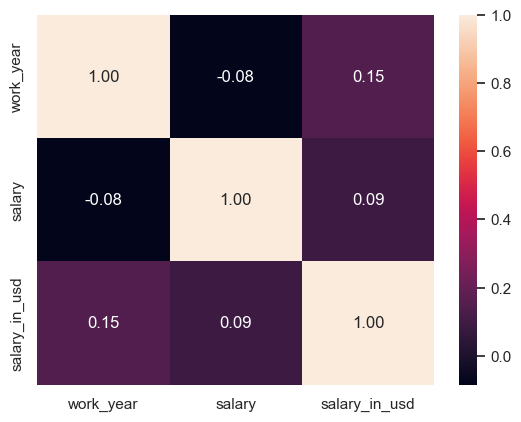

In [227]:
sns.heatmap(df[numericalCols].corr(), annot=True, fmt='.2f')
plt.show()

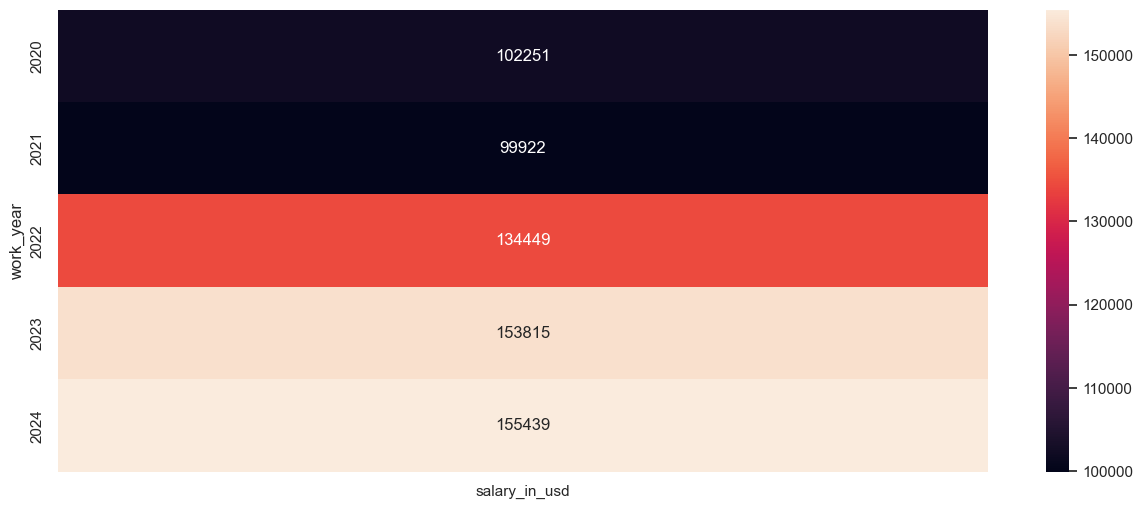

In [230]:
plt.figure(figsize=(15,6))
sns.heatmap(pd.pivot_table(df, values='salary_in_usd', index='work_year'), annot=True, fmt='.0f')
plt.show()

Based on the heatmap above, work_year has moderate relationship to the salary_in_usd which can be seen due to almost consistent shades of color from dark to bright which dark color indicates low salary and bright color indicates high salary.

# What role has the highest salary?

Since we have 173 job_titles which is a lot and the frequency might not be comparable because there're some job_title that only recorded once therefore here we provide 2 answer version, which are:
1. Highest salary ignoring frequencies
2. Highest salary based on median and mean which is more "frequency-friendly"

The reason of considering a frequency in this analysis is because there's a job_title with only low frequency but has high salary and that may affect the answer therefore we need to consider frequency.

In [274]:
jobGrouped = df.groupby('job_title')['salary_in_usd'].sum().reset_index().rename(columns={'salary_in_usd' : 'sum'}).sort_values(by='sum', ascending=False)
jobGrouped[:10]

,job_title,sum
46,Data Engineer,368275715
73,Data Scientist,356404078
100,Machine Learning Engineer,216077188
36,Data Analyst,178450918
126,Research Scientist,64355548
13,Applied Scientist,58712428
8,Analytics Engineer,46787046
43,Data Architect,43426566
125,Research Engineer,37518938
97,ML Engineer,25296278


In [275]:
jobGroupedFreqFriendly = df.groupby('job_title').agg({'salary_in_usd' : ['mean', 'median', 'std']}, skipna=True).reset_index()
jobGroupedFreqFriendly.columns = ['job_title', 'salary_usd_mean', 'median','std']
jobGroupedFreqFriendly = jobGroupedFreqFriendly.sort_values(by=['salary_usd_mean', 'median','std'], ascending=False)
jobGroupedFreqFriendly[:10]

,job_title,salary_usd_mean,median,std
9,Analytics Engineering Manager,399880.000000,399880.0,NaN
72,Data Science Tech Lead,375000.000000,375000.0,NaN
111,Managing Director Data Science,280000.000000,280000.0,28284.271247
7,AWS Data Architect,258000.000000,258000.0,NaN
29,Cloud Data Architect,250000.000000,250000.0,NaN
0,AI Architect,245161.625000,209968.0,68879.721560
84,Director of Data Science,218775.333333,217000.0,72953.991865
89,Head of Data,204919.200000,205000.0,80186.949737
47,Data Infrastructure Engineer,201375.416667,184500.0,70998.754133
67,Data Science Director,201000.000000,201000.0,12701.705922


As you can see from both table above, they are different because of the affect of frequency. The first table above excluding frequencies and the second table is more "frequency-friendly" because we are sorting the job based on the mean, median, and standard deviation to measure the spread of the data. Therefore there are two answer for this question which are.

1. Data Engineer has the highest salary when ignoring frequency
2. Analytics Engineering Manager has the highest salary when considering frequency

Both answers are valid however answer number 2 is wiser due to consideration of frequency.

# Summary

Based on the data we looked at, there are 173 different job titles in data-related roles. Most of these jobs are in medium-sized companies, suggesting that these industries are pretty mature when it comes to using data.

When it comes to how people work, most companies prefer people to work in the office, although some let employees work both in the office and remotely.

As for salaries, they depend on what job you have and how much experience you have. We found that as people gain more experience, their salaries tend to go up. In 2024, salaries were higher compared to previous years. Also, certain countries like Israel tend to pay higher salaries than others.

However, it's important to remember that the dataset we used has some limitations. So, while our findings are interesting, we should be careful not to draw too strong conclusions from them. To get a better understanding, we should look at more data from different sources.